In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx
/kaggle/input/market-basket-analysis/Assignment-1_Data.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/market-basket-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/market-basket-analysis


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Importing make_subplots

from mlxtend.frequent_patterns import apriori,association_rules


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/market-basket-analysis/Assignment-1_Data.csv",sep=";")
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [5]:
#Get Summary
print(df.shape)
print(df.info())

(522064, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB
None


In [6]:
df["Date"] = pd.to_datetime(df["Date"], format='%d.%m.%Y %H:%M')

df["Year/Month"] = df["Date"].dt.to_period("M")

In [7]:
# We notice that 'Price' column has commas in the numeric values, let's replace them and convert it to float
df["Price"] = df["Price"].str.replace(",",".").astype(float)

In [8]:
missing = df.isnull().sum()

print(missing)

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
Year/Month         0
dtype: int64


<Axes: >

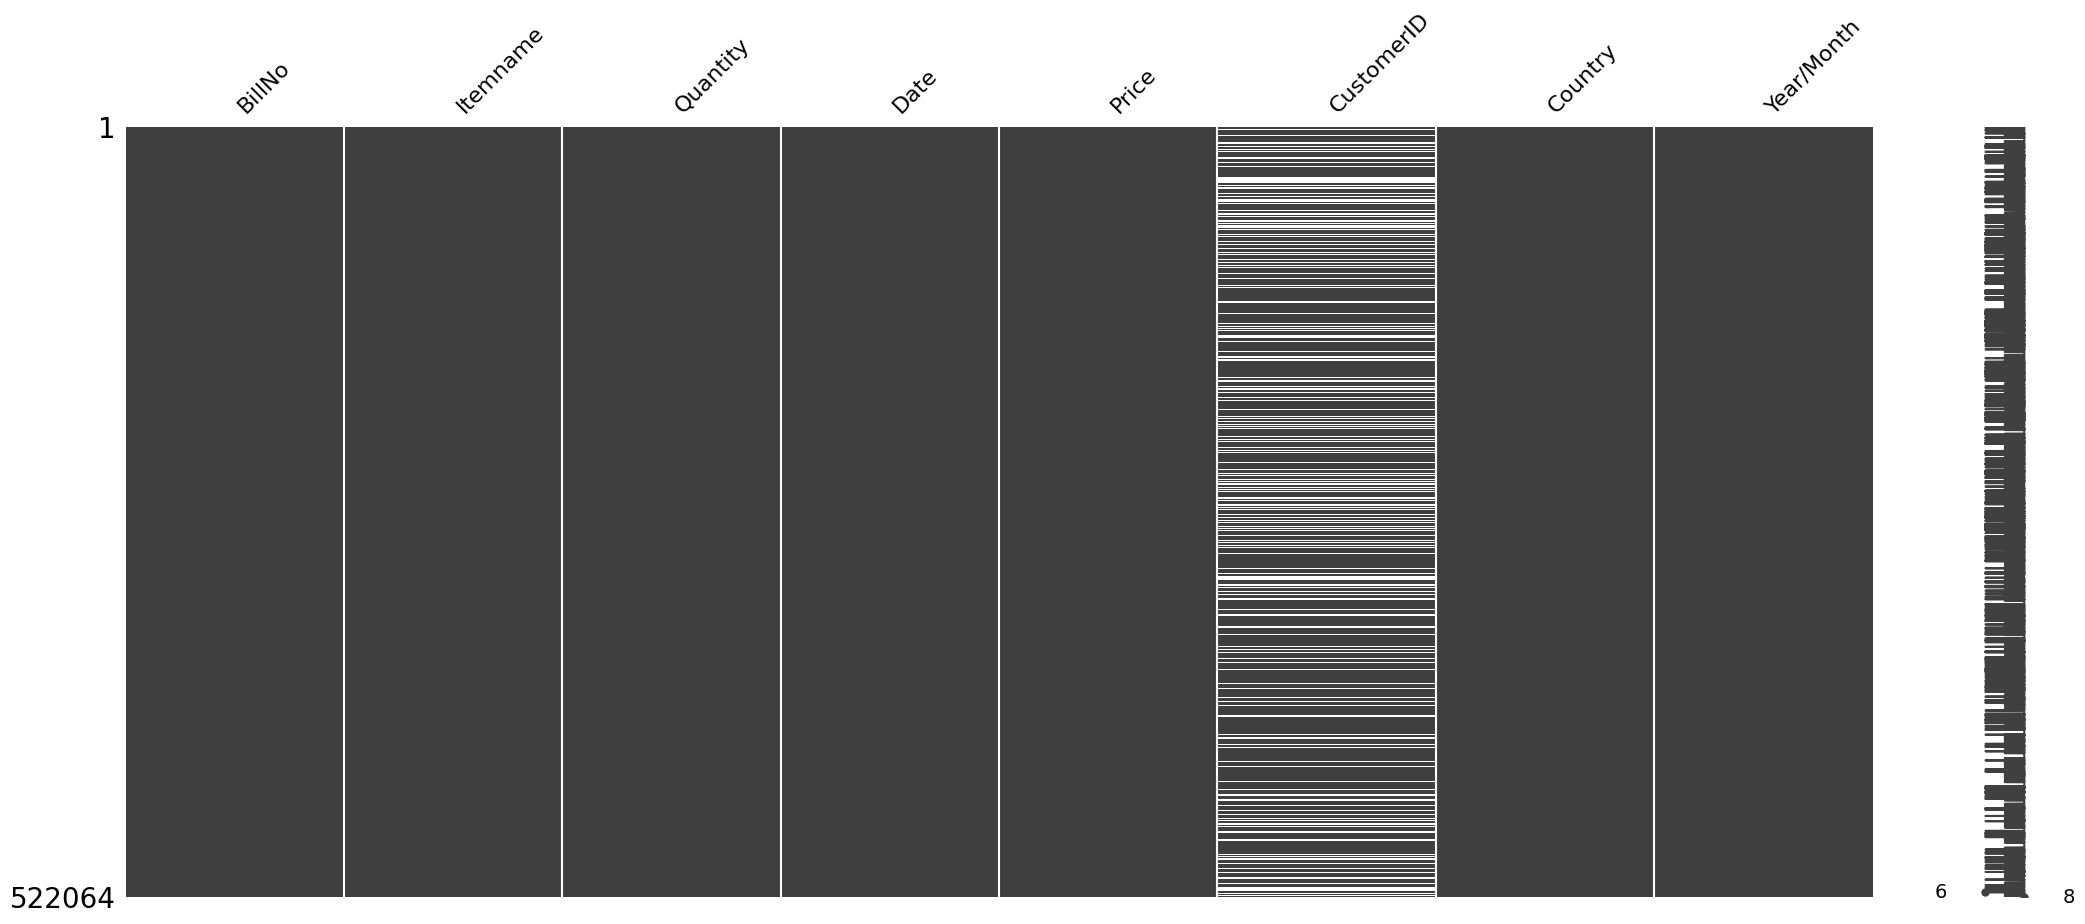

In [9]:
import missingno as msno

# Visualize missing values as a matrix 
msno.matrix(df) 

In [10]:
#Statistics
df.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


In [11]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]


In [12]:
#drop rows without item
df = df[df["Itemname"].notnull()]

In [13]:
# Filling missing customer IDs
df = df.fillna('#NV')
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519551 entries, 0 to 522063
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      519551 non-null  object        
 1   Itemname    519551 non-null  object        
 2   Quantity    519551 non-null  int64         
 3   Date        519551 non-null  datetime64[ns]
 4   Price       519551 non-null  float64       
 5   CustomerID  519551 non-null  object        
 6   Country     519551 non-null  object        
 7   Year/Month  519551 non-null  period[M]     
 8   TotalPrice  519551 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 39.6+ MB


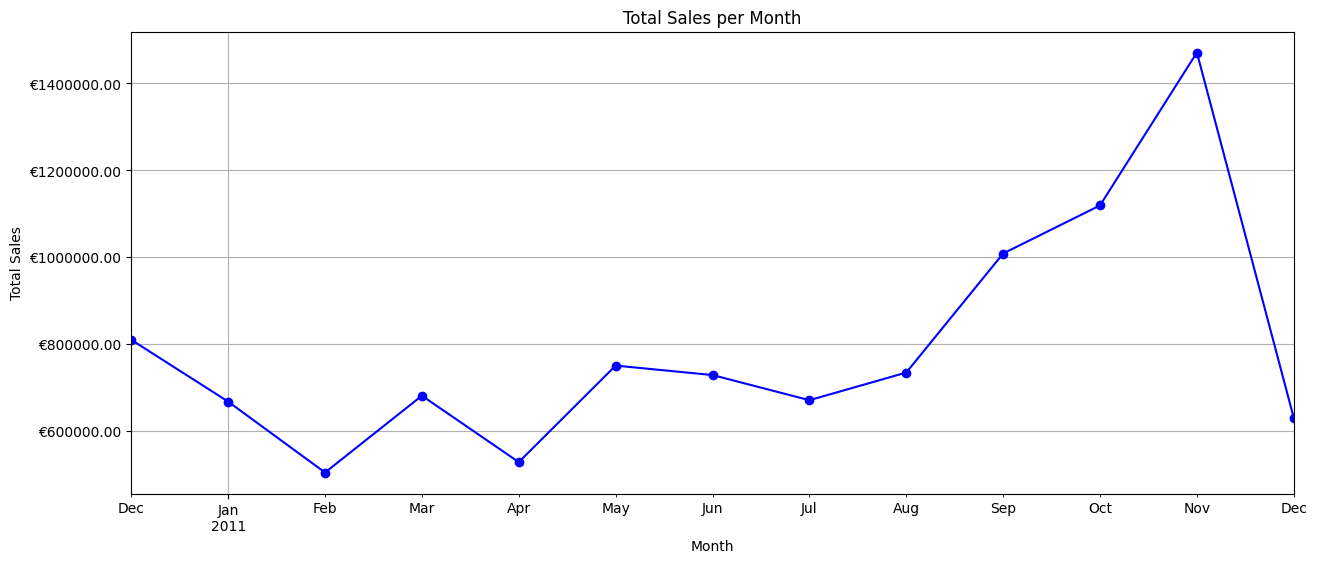

In [15]:
import matplotlib.ticker as ticker
# Grouping the data by month and year, and calculating the total sum of sales
monthly_sales = df.groupby('Year/Month')['TotalPrice'].sum()

plt.figure(figsize=(15,6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

formatter = ticker.FormatStrFormatter('€%.2f')
plt.gca().yaxis.set_major_formatter(formatter)  

plt.grid(True)
plt.show()

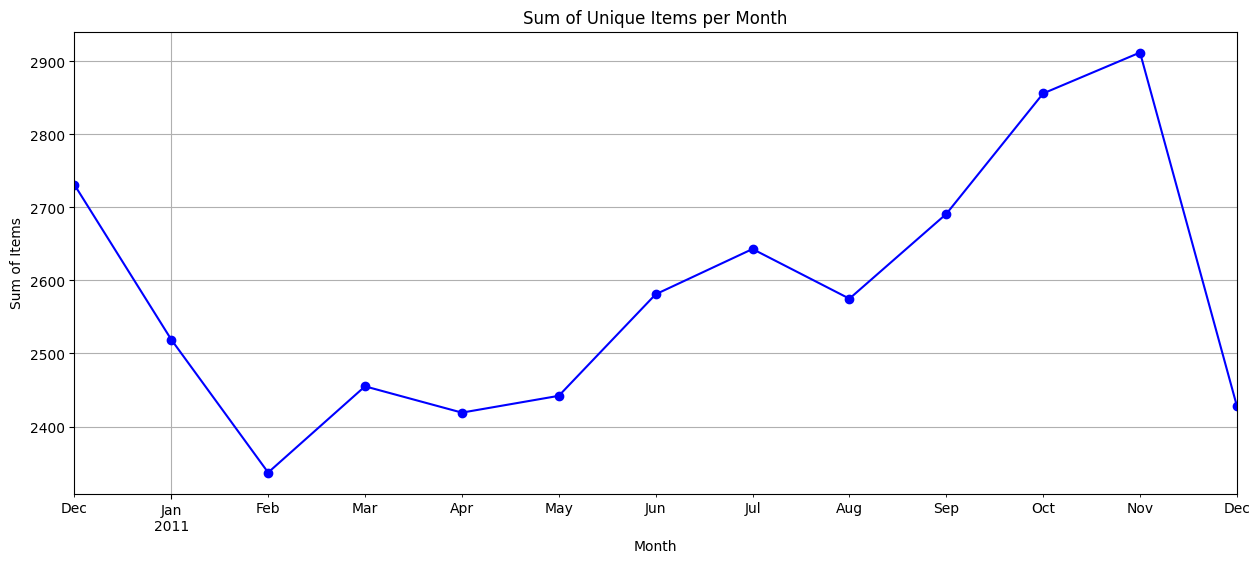

In [16]:
monthly_item = df.groupby("Year/Month")["Itemname"].nunique()

plt.figure(figsize=(15,6))
monthly_item.plot(kind="line",marker="o",color="b")
plt.title("Sum of Unique Items per Month")
plt.xlabel("Month")
plt.ylabel("Sum of Items")
plt.grid(True)
plt.show()

In [17]:
# Preprocessing the data
data_processed = df[['BillNo', 'Itemname']]
data_encoded = pd.get_dummies(data_processed, columns=['Itemname'])
data_encoded.columns = data_encoded.columns.str.replace("Itemname_", "")
basket = data_encoded.groupby('BillNo').sum()

basket.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
basket[basket > 0] = 1

In [19]:
frequent_itemsets = apriori(basket,min_support=0.02,use_colnames=True)


In [20]:
# Confidence represents the likelihood that the consequent item (item bought after) is purchased given the antecedent item(s) (item bought before). 
# A confidence of 0.6 implies that the consequent item is purchased in 60% of transactions where the antecedent item(s) are also present, indicating a strong positive relationship.
rules_confidenz = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(rules_confidenz.shape)
rules_c = rules_confidenz.round(3)
rules_c.head()

(4, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038,0.050,0.031,0.822,16.521,0.029,5.332,0.976
1,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.031,0.052,0.026,0.851,16.449,0.025,6.364,0.969
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029,0.050,0.026,0.903,18.161,0.025,9.831,0.973
3,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.026,0.105,0.021,0.802,7.608,0.018,4.508,0.892


In [21]:
# Lift measures how much more likely the consequent item(s) are purchased when the antecedent item(s) are present compared to when they are not. 
# A lift value of 1.0 indicates that the items in the consequent are bought together as often as would be expected by chance.
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold= 2.5)
print(rules_lift.shape)
rules_l = rules_lift.round(3)
rules_l.head()

(174, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041,0.065,0.022,0.545,8.337,0.020,2.055,0.917
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.065,0.041,0.022,0.340,8.337,0.020,1.454,0.942
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.049,0.039,0.021,0.425,10.954,0.019,1.672,0.956
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.039,0.049,0.021,0.542,10.954,0.019,2.073,0.945
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049,0.053,0.032,0.655,12.468,0.030,2.743,0.968


In [22]:
# Support quantifies the frequency with which a rule occurs in the dataset.
# A support of 0.05 means that the rule occurs in at least 5% of transactions, signifying its significance in the dataset.
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.03)
print(rules_support.shape)
rules_s = rules_support.round(3)
rules_s.head()

(16, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049,0.053,0.032,0.655,12.468,0.030,2.743,0.968
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.053,0.049,0.032,0.616,12.468,0.030,2.478,0.971
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038,0.050,0.031,0.822,16.521,0.029,5.332,0.976
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050,0.038,0.031,0.621,16.521,0.029,2.538,0.989
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050,0.052,0.037,0.750,14.502,0.035,3.797,0.980


In [23]:
# Create subplots in Plotly
fig = make_subplots(rows=3, cols=1, subplot_titles=('Distribution of Confidence', 
                                                    'Distribution of Lift', 
                                                    'Distribution of Support'))

# Confidence Histogram
fig.add_trace(
    go.Histogram(x=rules_c['confidence'], nbinsx=20, histnorm='density', name='Confidence'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=rules_c['confidence'], y=pd.Series(rules_c['confidence']).value_counts(normalize=True).sort_index(), 
               mode='lines', line=dict(color='red'), name='KDE'),
    row=1, col=1
)
# Lift Histogram
fig.add_trace(
    go.Histogram(x=rules_l['lift'], nbinsx=20, histnorm='density', name='Lift'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=rules_l['lift'], y=pd.Series(rules_l['lift']).value_counts(normalize=True).sort_index(), 
               mode='lines', line=dict(color='red'), name='KDE'),
    row=2, col=1
)

# Support Histogram
fig.add_trace(
    go.Histogram(x=rules_s['support'], nbinsx=20, histnorm='density', name='Support'),
    row=3, col=1
)
fig.add_trace(go.Scatter(x=rules_s['support'], y=pd.Series(rules_s['support']).value_counts(normalize=True).sort_index(), 
               mode='lines', line=dict(color='red'), name='KDE'),
    row=3, col=1
)

# Update layout
fig.update_layout(height=900, width=800, title_text="Distribution of Confidence, Lift, and Support", 
                  showlegend=False)

# Update axes titles
fig.update_xaxes(title_text="Confidence", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_xaxes(title_text="Lift", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_xaxes(title_text="Support", row=3, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)

fig.show()
